In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,California,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
x = df.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'California'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'California'],
       [100671.96, 91790.61, 249744.55, 'Florida'],
       [93863.75, 127320.38, 249839.44, 'California'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79

In [6]:
y = df.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [7]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder()
x[:,3] = Label.fit_transform(x[:,3])
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 0],
       [100671.96, 91790.61, 249744.55, 1],
       [93863.75, 127320.38, 249839.44, 0],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 2],
       [86419.7, 153514.11, 0.0, 1],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [3])], remainder ="passthrough")
x = np.array(ct.fit_transform(x))
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
model = lr.fit(x_train,y_train)

In [12]:
predicted_values = lr.predict(x_test)

In [13]:
predicted_values

array([125685.70020548,  84338.92317127,  99390.93658773,  46818.58913869,
       128971.45588833,  52062.29882127, 109174.11382466,  99985.2596175 ,
        97162.65075526, 115228.18387689])

In [14]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predicted_values)
print (accuracy)

0.8988481687286216


In [15]:
predicted_values.shape

(10,)

In [16]:
result = pd.concat([pd.DataFrame(y_test, columns = ['Actual']),
                    pd.DataFrame(predicted_values, columns = ['Prediction'])],axis = 1)
result['Difference'] = y_test - predicted_values
result.head()

,Actual,Prediction,Difference
0,134307.35,125685.700205,8621.649795
1,81005.76,84338.923171,-3333.163171
2,99937.59,99390.936588,546.653412
3,64926.08,46818.589139,18107.490861
4,125370.37,128971.455888,-3601.085888


In [17]:
result = pd.concat([pd.DataFrame(x_test,columns= ['CF','FR','New Y','R&D','Admin','Mark']),result], axis =1)
result['Difference'] = result['Actual'] - result['Prediction']
result

,CF,FR,New Y,R&D,Admin,Mark,Actual,Prediction,Difference
0,1.0,0.0,0.0,91992.39,135495.07,252664.93,134307.35,125685.700205,8621.649795
1,1.0,0.0,0.0,38558.51,82982.09,174999.3,81005.76,84338.923171,-3333.163171
2,0.0,0.0,1.0,61994.48,115641.28,91131.24,99937.59,99390.936588,546.653412
3,0.0,0.0,1.0,1000.23,124153.04,1903.93,64926.08,46818.589139,18107.490861
4,0.0,0.0,1.0,94657.16,145077.58,282574.31,125370.37,128971.455888,-3601.085888
5,0.0,0.0,1.0,542.05,51743.15,0.0,35673.41,52062.298821,-16388.888821
6,0.0,0.0,1.0,75328.87,144135.98,134050.07,105733.54,109174.113825,-3440.573825
7,1.0,0.0,0.0,64664.71,139553.16,137962.62,107404.34,99985.259617,7419.080383
8,1.0,0.0,0.0,63408.86,129219.61,46085.25,97427.84,97162.650755,265.189245
9,0.0,1.0,0.0,86419.7,153514.11,0.0,122776.86,115228.183877,7548.676123


In [21]:
y_predict = lr.predict(x)
y_predict

array([192212.66545468, 187030.55971063, 185183.93437002, 174140.32762984,
       172930.11655401, 164924.33544171, 155710.36151199, 158957.99543858,
       150463.49430464, 154641.48410322, 134995.5117714 , 138704.12846331,
       127759.84928263, 125685.70020548, 149424.57045841, 146216.94359658,
       115791.91754095, 128971.45588833, 129388.42927956, 115228.18387689,
       115950.05160435, 115612.79873554, 113555.99633348, 109700.50708279,
       114259.51926276,  99985.2596175 , 109174.11382466, 114078.10758204,
        99825.31692071,  99841.95049281,  99390.93658773,  95712.15395369,
        97162.65075526,  98630.16447031,  88531.79037817,  92107.93605122,
        74651.63335333,  91908.32121706,  72157.84688138,  84338.92317127,
        76212.09086728,  75271.61487554,  70462.80150005,  59263.1780714 ,
        61283.530578  ,  46818.58913869,  57756.44854214,  44044.39972198,
        52062.29882127,  46774.0366118 ])

In [22]:
y_predict = pd.DataFrame(y_predict, columns =['Prediction'])
result = pd.concat([df,y_predict], axis =1)
result['Difference'] = result['Profit'] - result ['Prediction']
result

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Difference
0,165349.20,136897.80,471784.10,New York,192261.83,192212.665455,49.164545
1,162597.70,151377.59,443898.53,California,191792.06,187030.559711,4761.500289
2,153441.51,101145.55,407934.54,Florida,191050.39,185183.934370,5866.455630
3,144372.41,118671.85,383199.62,New York,182901.99,174140.327630,8761.662370
4,142107.34,91391.77,366168.42,California,166187.94,172930.116554,-6742.176554
5,131876.90,99814.71,362861.36,New York,156991.12,164924.335442,-7933.215442
6,134615.46,147198.87,127716.82,California,156122.51,155710.361512,412.148488
7,130298.13,145530.06,323876.68,New York,155752.60,158957.995439,-3205.395439
8,120542.52,148718.95,311613.29,New York,152211.77,150463.494305,1748.275695
9,123334.88,108679.17,304981.62,California,149759.96,154641.484103,-4881.524103


In [23]:
accuracy = r2_score(y, y_predict)
print (accuracy)

0.9499635752382365


<module 'matplotlib' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

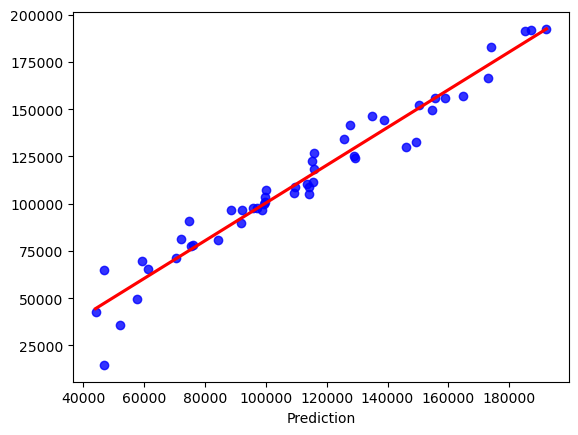

In [25]:
import seaborn as sns
sns.regplot( x = y_predict, y = y, scatter_kws={"color": "b"}, 
            line_kws={"color": "r"},ci = None)
plt